# Neural Network - Exercise 01

    python -m venv NN-venv
    NN-venv\Scripts\activate
    python.exe -m pip install --upgrade pip
    pip install matplotlib numpy ipykernel jupyter
    ipython kernel install --name "NN-venv" --user
    https://queirozf.com/entries/jupyter-kernels-how-to-add-change-remove

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import jupyprint.jupyprint as jp
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
# from graphviz import Digraph 

In [2]:
# List of flags to enable or disable parts of codes

flag_trained_network    = False

flag_my_init_pars       = True
flag_training           = True
flag_save               = False

flag_testing            = True

In [3]:
# Trained Network

if flag_trained_network:
    file_name = 'Trained_Network.mat'
    # file_name = 'Trained_Network-(2024-05-01_19-31-24).mat'
    mat_data = loadmat(file_name)

    weights          = mat_data['Weight'][0]
    correct_outputs  = mat_data['correct_Output'].T[0]
    epoch            = mat_data['epoch'][0][0]
    f_inputs         = mat_data['input']

    jp('### Weights')
    print(weights)
    jp('### Correct Outputs')
    print(correct_outputs)
    jp('### Feature Inputs')
    print(f_inputs)
    jp('### Epoch')
    print(epoch)

## Sigmoid Function

$\text{Sigmoid}(x)=\dfrac{1}{1+e^{-x}}$

$\dfrac{\partial}{\partial x}\left[\text{Sigmoid}(x)\right]=\dfrac{e^{-x}}{(1+e^{-x})^2}=\dfrac{1}{1+e^{-x}}\cdot\left(1-\dfrac{1}{1+e^{-x}}\right)$

In [4]:
# Sigmoid Function

def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Stochastic Gradient Descent
$w'_i=w_i-\text{LR}\cdot\frac{\partial f_{cost}}{\partial w_i}=w_i-\text{LR}\cdot\frac{\partial f_{cost}}{\partial P}\cdot\frac{\partial P}{\partial t}\cdot\frac{\partial t}{\partial w_i}$ 

Con:
- $w_i$: Peso della i-esima feature
- $\text{LR}$: Learning Rate
- $f_{cost}$: Funzione di costo
- $t$: Combinazione lineare delle feature pesate 
- $P$: Combinazione lineare normalizzata con la sigmoid

In [5]:
# Stochastic Gradient Descent

def SGD_method(weights, dataset, correct_output, LR = 0.9):
                                                                    # weight:           vettore dei pesi relativi alle feature
                                                                    # f_input:          dataset contenente i valori delle feature per ciascun campione
                                                                    # correct_output:   vettore dei valori attesi per ciascun campione
                                                                    # LR:               learning rate

    for k in range(len(dataset)):                                   # ciclo sui campioni
        
        sample = dataset[k]                                         # prendo i valori delle feature del k-esimo campione
        expected = correct_output[k]                                # prendo il valore atteso del k-esimo campione
        lin_comb = weights @ sample                                 # combinazione lineare delle feature pesate per il k-esimo campione
        predicted = Sigmoid(lin_comb)                               # normalizzazione della comb. lin. attraverso la funzione Sigmoid         
        cost_function_der = 2 * (predicted - expected)              # derivata della funzione di costo (rispetto alla variabile predicted) 
                                                                    # relativa alla metrica Squared Error Cost                         
        sigmoid_der = predicted * (1 - predicted)                   # derivata del sigmoid rispetto a lin_comb
        lc_der = sample                                             # vettore di derivate di lin_comb rispetto ai pesi w (e al bias b)

        dWeights = LR * cost_function_der * sigmoid_der * lc_der    # termine differenziale di aggiustamento per ricavare i nuovi pesi
        weights -= dWeights                                         # correzione dei pesi

    return weights

## Training

In [6]:
# initial parameters

if flag_my_init_pars:
    weights          = 2 * np.random.rand(3) - 1                # crea una matrice 1x3 con numeri casuali tra -1 e 1
    correct_outputs  = np.array([0, 0, 1, 1])               
    epoch            = 1000
    f_inputs         = np.array([[0, 0, 1],
                                 [0, 1, 1],
                                 [1, 0, 1],
                                 [1, 1, 1]])

In [7]:
# Allena il modello in base all'epoca scelta 
if flag_training:
    container_w = np.array([weights])
    for e in range(epoch):
        weights = SGD_method(weights, f_inputs, correct_outputs)
        container_w = np.vstack((container_w, weights))
    # Salva modello
    Trained_Network = {
        "Weight"         : weights,
        "correct_Output" : correct_outputs.T,
        "epoch"          : [[epoch]],
        "input"          : f_inputs
    }

In [ ]:
if flag_save:
    date = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
    file_name = f'Trained_Network-[{date}].mat'
    savemat(file_name, Trained_Network)

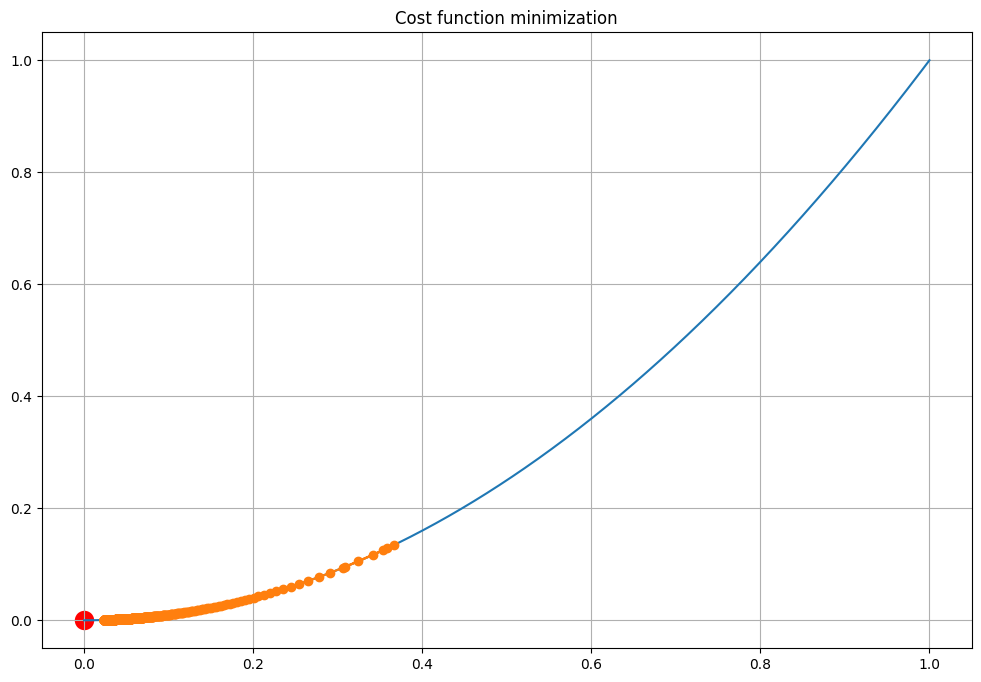

In [8]:
if flag_training:
    def cost_func(x, x0):
        return (x - x0)**2

    x = np.linspace(0, 1, 1000)  
    x0 = 0

    plt.figure(figsize=(12,8))

    plt.grid()
    plt.plot(x, cost_func(x, x0))

    P = Sigmoid(container_w @ f_inputs[0])
    E = np.ones(len(P)) * correct_outputs[0]
    plt.scatter(E[0],0, color='red', linewidth=8)
    plt.plot(P, cost_func(P, E), marker = 'o')
    plt.title('Cost function minimization')
    plt.show()

## Testing

In [9]:
if flag_testing:
       file_name_trained = file_name
       mat_data = loadmat(file_name_trained)

       weights          = mat_data['Weight'][0]
       correct_outputs  = mat_data['correct_Output'].T
       epoch            = mat_data['epoch'][0][0]
       f_inputs         = mat_data['input']

       # Ciclo sui 4 vettori di input
       for k in range(len(f_inputs)):                       
              weighted_sum = weights @ f_inputs[k]  # Prodotto scalare tra pesi allenati e input
              predicted = Sigmoid(weighted_sum) 
              
              print('input ', k+1)
              print('Output corretto : ', correct_outputs[k,0], ', Predetto : ', predicted)

input  1
Output corretto :  0 , Predetto :  0.023297351551457134
input  2
Output corretto :  0 , Predetto :  0.01891305186444052
input  3
Output corretto :  1 , Predetto :  0.9846481080613296
input  4
Output corretto :  1 , Predetto :  0.9810734075493219
